군집

- 데이터 집합을 클러스터(cluster)라는 그룹으로 분할
- 어느 클러스터에 속할지 예측

K-Means clustering

- 가장 간단하고 널리 사용됨
- 임의의 클러스터 중심에 데이터 포인트를 할당
- 평균을 내어 다시 클러스터 중심을 계산
- 클러스터에 할당되는 데이터 포인트의 변화가 없으면 알고리즘 종료

In [16]:
#multi class -> a 아니면 나머지 , b 아니면 나머지  , (이진)
#(NB, KNN, DT, Logistic)

#mulitnomial -> a,b,c, 중 한가지를 선택'
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn

#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문



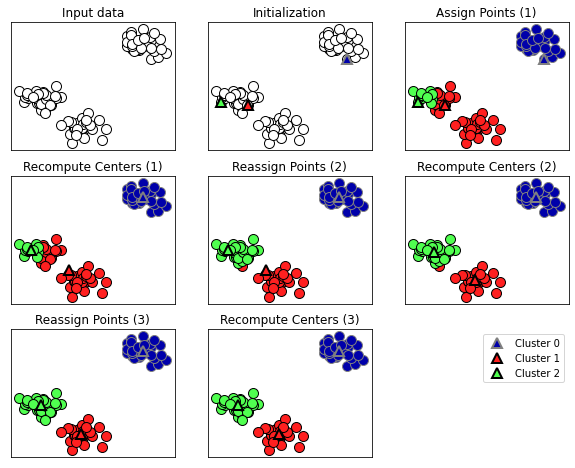

In [2]:
#K - means 예제
import mglearn
mglearn.plots.plot_kmeans_algorithm()

#Assign Points = 포인트 할당 (각 군집의 중심에 따라 색깔 부여)

#Recompute Centers = 중심 재계산 (군집의 중심점을 다시 잡는다.)

#Ressgin Points = 포인트 재할당 (바뀐 중심을 기준으로 색깔 다시 부여)

#즉 군집의 가운데 점을 계속해서 개선해나가는 과정을 보여주는 것임

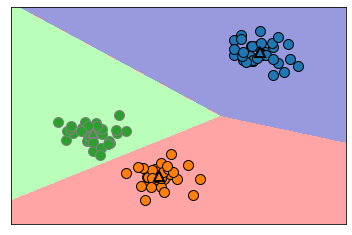

In [3]:
mglearn.plots.plot_kmeans_boundaries()
#k평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계 표현

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#데이터를 랜덤으로 생성한다.
X,y = make_blobs(random_state = 1)

# 3개의 클러스터를 설정한다. 
kmeans = KMeans(n_clusters = 3)

# 3개의 클러스트일 때 학습을 시킨다.
kmeans.fit(X)

# 학습시킨 값들의 타겟값들을 출력시킨다.
print("클러스터 레이블:\n{}".format(kmeans.labels_))

#새로운 데이터 클러스터 레이블을 예측한다. 예측은 각 포인트에 가장 가까운
#클러스터 중심을 할당하는 것이며 기존 모델을 변경하지 않는다.
print("훈련세트 예측값:\n",kmeans.predict(X))

클러스터 레이블:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]
훈련세트 예측값:
 [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


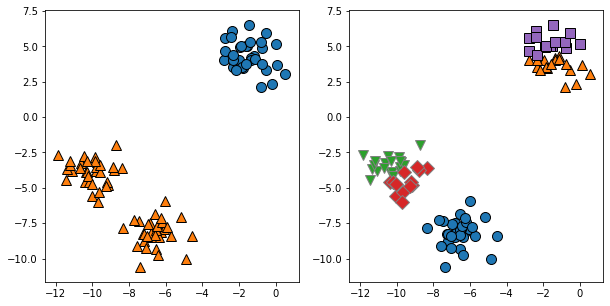

In [13]:
fig, axes = plt.subplots(1,2, figsize= (10,5))

#클러스터가 2개일때 kmeans 설정
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

#군집 두개인 그래프 (왼쪽)
mglearn.discrete_scatter(X[:,0], X[:,1],assignments, ax = axes[0])

#클러스터가 5개 kmeans 설정
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

#군집 5개인 그래프 (오른쪽)
mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax = axes[1])


그래프 1


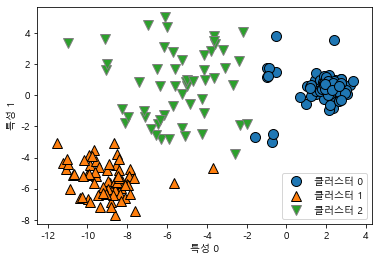

In [22]:
#200개의 샘플을 인위적으로 생성한다. 
X_varied, y_varied = make_blobs(n_samples=200, cluster_std = [1.0, 2.5, 0.5],
                               random_state = 170)

#3개의 클러스터를 가진 KMeans를 X값에 학습시킨다.
y_pred = KMeans(n_clusters=3, random_state =0).fit_predict(X_varied)

#3개의 군집으로 학습시킨 데이터를 산점도로 그린다.
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc = 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
print("그래프 1")

그래프 2


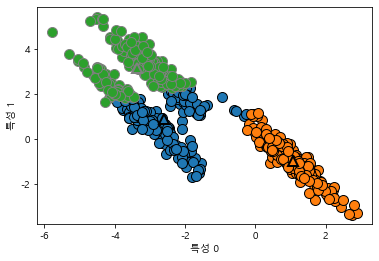

In [21]:
#무작위로 클러스터 데이터를 생성한다.
X, y = make_blobs(random_state = 170, n_samples = 600)
rng = np.random.RandomState(74)

#데이터가 늘어지도록 변경한다.
transformation = rng.normal(size = (2,2))
X = np.dot(X, transformation)

#세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용한다.
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:,0], X[:,1],kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                        [0,1,2], markers='^', markeredgewidth = 2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("그래프 2")

K-means 알고리즘 한계

- 클러스터 수를 명시적으로 결정해야함
- 클러스터 중심이 하나여서 둥근 형태
- 반경이 동일하다고 가정
- 클러스터 0,1에 멀리 떨어진 포인트도 포함(그래프 1)
- 방향을 고려하지 않고 거리만 고려 (그래프 2)
- 레이블이 의미가 없음 (1차시도에서는 0,1,2) -> (2차에서는 1,2,0이 될 수 있음)

클러스터 레이블 :
[1 2 2 0 0 1 2 0 1 0 2 1 1 0 1 2 0 0 1 0 1 0 0 1 0 0 0 0 2 1 2 0 1 1 0 1 2
 2 1 1 2 0 1 0 2 0 2 2 0 2 2 1 1 2 1 0 2 2 0 2 2 0 1 1 2 1 2 0 1 1 2 2 1 1
 2 2 0 2 1 2 2 0 1 1 0 0 0 1 0 2 0 0 0 0 2 0 0 0 2 2 1 1 2 0 1 1 2 1 1 2 2
 1 0 1 1 2 2 0 0 0 0 1 1 2 1 0 1 1 1 1 2 0 1 0 0 1 0 0 1 1 1 2 1 0 0 2 0 1
 1 0 2 1 0 1 1 1 2 1 2 2 0 1 1 0 0 0 1 0 1 1 1 0 0 0 2 0 0 0 0 0 0 2 0 2 2
 1 0 2 0 1 0 1 2 1 2 0 0 0 0 2]


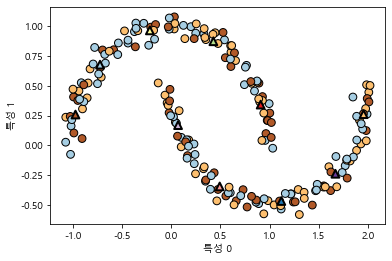

In [24]:
from sklearn.datasets import make_moons
#반달 모양의 200개 샘플 데이터 셋을 가져온다.
X, y = make_moons(n_samples = 200, noise = 0.05, random_state= 0)

#클러스터 10개로 kmeans 설정한다.
kmeans = KMeans(n_clusters=10, random_state = 0 )
kmeans.fit(X)

plt.scatter(X[:,0], X[:,1],c = y_pred, s = 60, cmap = 'Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 60,
           marker='^', c= range(kmeans.n_clusters),linewidth=2,cmap='Paired',
           edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블 :\n{}".format(y_pred))

K-means 정리

장점 
- 이해와 구현이 쉬움, 비교적 빠름
- 대규모 데이터셋에 적용가능
- MiniBatchMeans : 대용량 데이터 대상 
    
단점
- 클러스터 모양에 제한적임 (화살표 모향 같은 거)
- 클러스터 개수를 설정해야함 (실제로는 알 수 없음)
- 초기값에 따라 결과가 달라질 수 있음.


##########################################################

병합 군집
- 각 데이터가 하나의 클러스터
- 지정된 클러스터 개수가 될 때까지 가까운 두 클러스터를 병합

scikit-learn()
- ward : 기본값인 ward은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러 합침
- average : 클러스터 포인트 사이의 평균거리가 가장 짧은 두 클러스터 합침
- complete : 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터 합침


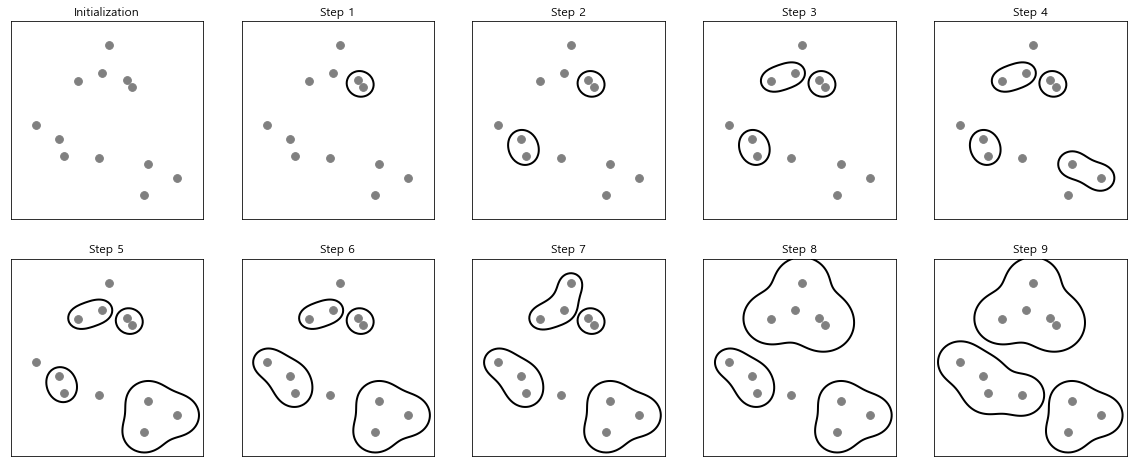

In [27]:
mglearn.plots.plot_agglomerative_algorithm()

#3개의 클러스터를 찾기 위한 병합 군집의 과정 보여주는 그래프

Text(0, 0.5, '특성 1')

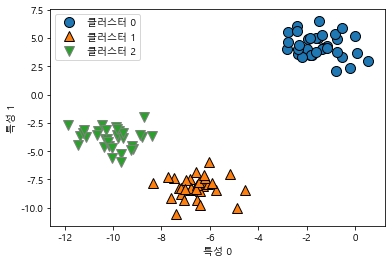

In [29]:
#병합 군집은 predict 메서드가 없다. -> 새로운 포인트에 대해 예측할 수 없음.
#대신 훈련 세트로 모델을 만들고 클러스터 소속 정보를 얻기 위해 fit_predict 메소드 사용

from sklearn.cluster import AgglomerativeClustering
#임의의 데이터 셋을 저장한다.
X, y = make_blobs(random_state = 1)

#agg 객체를 생성하여 병합군집 (클러스터 3)을 적용한다.
agg = AgglomerativeClustering(n_clusters = 3)

# fit 메서드에서 찾은 labels_를 반환한다.
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1],assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"],loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

계층적 군집과 덴드로 그램


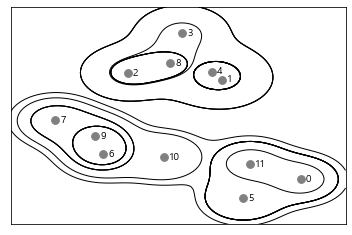

In [30]:
mglearn.plots.plot_agglomerative()
#병합군집 되는 과정의 클러스터를 모두 표현한 것
#이는 2차원의 데이터밖에 표현을 못한다

#하지만 !!!!덴드로그램!!!!은 다차원 데이터 셋을 처리할 수 있따.

Text(0, 0.5, '클러스터 거리')

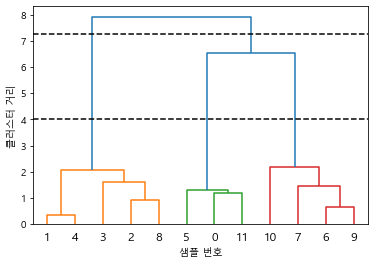

In [44]:
#Scipy에서 ward 군집 함수와 덴드로 그램 import
from scipy.cluster.hierarchy import dendrogram, ward

#임의의 데이터 셋 12개 저장
X, y = make_blobs(random_state=0, n_samples = 12)


#데이터 배열 X에 ward함수를 적용
#ward는 병합군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환한다.
Linkage_array = ward(X)

#클러스터 간의 거리 정보가 담긴 Linkage_arry를 사용해 덴드로그램을 그린다.
dendrogram(Linkage_array)

# 두개와 세개의 클러스트를 구분하는 커트라인을 표시한다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4,4], '--', c= 'k')

plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

DBSCAN 알고리즘

- 클러스터 개수를 미리 지정할 필요 없음
- 복잡한 형상에 적용가능, 노이즈 포인트 구분
- k-평균이나 병합 군집보다는 느림
- 기하학 모양의 군집도 잘 찾음
- 새로운 데이터 예측 불가


ㅁ 데이터가 많은 밀집 지역 찾아 클러스터 구성
1. Core points : eps거리내에 min_sample 수만큼 존재
2. Eps(엡실론) : 같은 클러스토로 분류 될 수 있는 두 샘플 사이의 최대 거리
3. min_samples : 한 포인트에 대해 핵심 샘플로 같은 클러스터로 분류될 샘플 수


ㅁ 진행 방법
1. 무작위로 포인트 선택으로 시작
2. eps 거리안의 포인트를 찾음 
3. eps 거리내의 포인트 > min_samples 이면 핵심포인트(core)로 분류, 새 클러스터 할당
4. 해당 클러스터 다 찾으면 아직 방문하지 않은 포인트 랜덤으로 다시 시작

In [45]:
from sklearn.cluster import DBSCAN
import mglearn

dbscan = DBSCAN()

X, y = make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))

        

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


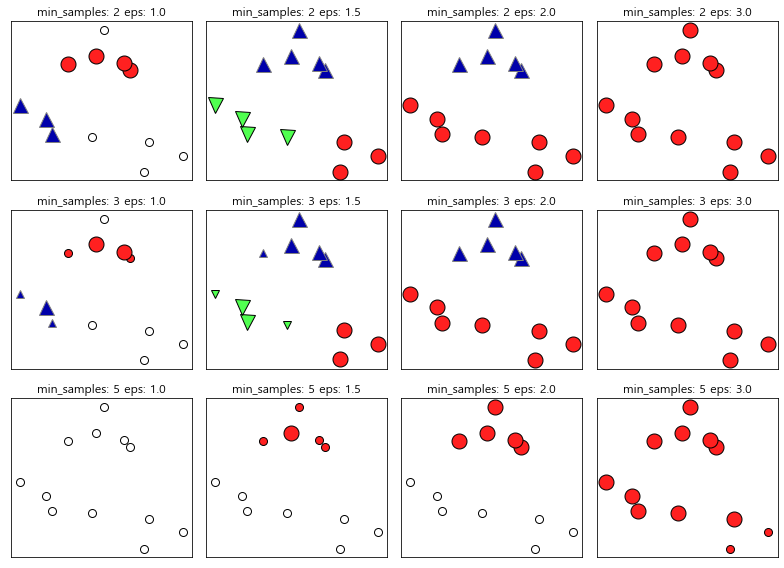

In [47]:
mglearn.plots.plot_dbscan()

#핵심포인트 = eps 거리내의 포인트 > min_samples (크기 크게 해놨음)
#전부 다 크면 모든 점이 핵심포인트인 거임.

#min_sample 수를 늘리면 핵심포인트 수가 늘면서 noise 포인트가 많아진다.

#eps 와 min_sample을 적절하게 설정해야 클러스터를 잘 나눌 수 있음을 확인할 수 있다.


#!!!!!!!!!!!!!! 꿀팁
#적절한 eps 값을 쉽게 찾으려면 StandardScaler나 MinMaxScaler로 모든 특성의 
#스케일을 비슷한 범위로 조정해주는 것이 좋다.

Text(0, 0.5, '특성 0')

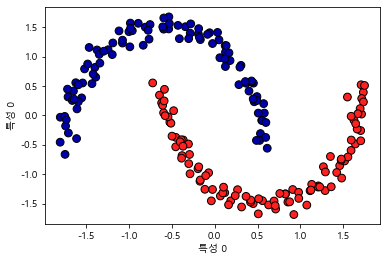

In [54]:
from sklearn.preprocessing import StandardScaler

#반달 모양의 데이터셋을 저장한다.
X, y = make_moons(n_samples = 200, noise=0.05, random_state=0)

#데이터 전처리를 위해 StandardScaler 객체를 생성한다.
scaler = StandardScaler()
scaler.fit(X)
#스케일한 데이터의를 X_scaled 에 저장한다.
X_scaled = scaler.transform(X)

#DBSCAN 객체를 생성하여 저장한다.
dbscan = DBSCAN()

#스케일한 데이터를 DBSCAN하여 클러스터링 한다.
clusters = dbscan.fit_predict(X_scaled)

#클러스터링한 데이터 셋을 그래프로 그린다.
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c= clusters, cmap =mglearn.cm2, s=60,
           edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 0")

#DBSCAN(eps=?) 에서 eps 값을 설정하면 클러스터의 개수가 달라지는 것을 확인할 수 있다.
#즉, DBSCAN을 사용할 때 EPS 값을 주의해서 다뤄야 한다.
